In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('../content/train.csv')
test = pd.read_csv('../content/test.csv')

# 1. 데이터 확인

In [2]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g) -> target

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


- 114개의 데이터, 11개 피처
- 범주형 피처 4개(Species, Island, Clutch Competition, Sex)
- 숫자형 피처 7개(id, Culmen Length, Culmen Depth, Fipper Length, Delta 15 N, Delta 13 C, Body Mass) 
- Null 값 존재(Sex, Delta 15 N, Delta 13 C)

In [15]:
train.corr()

,id,Culmen Length,Culmen Depth,Flipper Length,Delta15N,Delta13C,Body Mass
id,1.000000,0.078787,-0.144788,0.077909,-0.034522,0.023754,0.089186
Culmen Length,0.078787,1.000000,-0.251255,0.672205,-0.038911,0.111280,0.572063
Culmen Depth,-0.144788,-0.251255,1.000000,-0.603341,0.645813,0.474151,-0.490643
Flipper Length,0.077909,0.672205,-0.603341,1.000000,-0.524236,-0.446668,0.864814
Delta15N,-0.034522,-0.038911,0.645813,-0.524236,1.000000,0.641107,-0.543740
Delta13C,0.023754,0.111280,0.474151,-0.446668,0.641107,1.000000,-0.464210
Body Mass,0.089186,0.572063,-0.490643,0.864814,-0.543740,-0.464210,1.000000


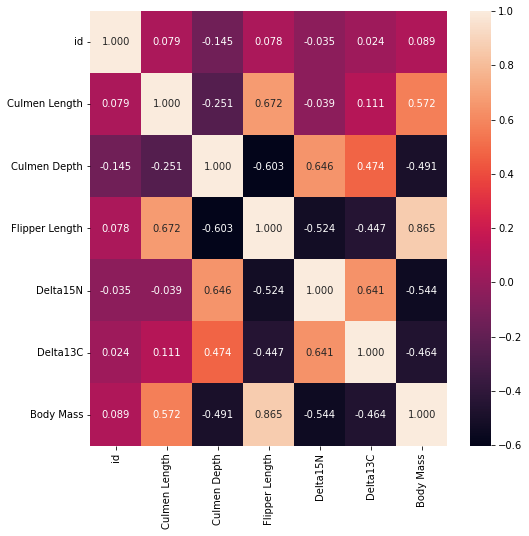

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(),annot=True, fmt = '.3f')

수치형 피처 중 타깃 데이터(Body Mass)와 상관 계수가 높은 피처는 'Flipper Length', 'Culmen Length', 'Delta 15 N' 피처 순으로 나타남

# 2. 데이터 전처리

## 결측값 처리

In [4]:
train[train.isna().sum(axis=1) > 0] # Null 값이 포함된 행 확인

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


train 데이터는 SEX, Delta 15 N, Delta 13 C 열에서 8개의 결측치 존재

In [5]:
test[test.isna().sum(axis=1) > 0] # Null 값이 포함된 행 확인

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
27,27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,75,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


테스트 데이터 총 24개의 결측치 존재

In [7]:
# Delta 15 N, Delta 13 C 피처의 결측치를 평균값으로 대체
train['Delta 15 N (o/oo)'] = train['Delta 15 N (o/oo)'].fillna(train['Delta 15 N (o/oo)'].mean())
train['Delta 13 C (o/oo)'] = train['Delta 13 C (o/oo)'].fillna(train['Delta 13 C (o/oo)'].mean())
test['Delta 15 N (o/oo)'] = test['Delta 15 N (o/oo)'].fillna(train['Delta 15 N (o/oo)'].mean())
test['Delta 13 C (o/oo)'] = test['Delta 13 C (o/oo)'].fillna(train['Delta 13 C (o/oo)'].mean())

- 데이터 누수(Data leakage)에 대한 이야기가 있어 test 데이터의 결측치도 train 데이터의 평균치로 대체
- 결측치는 평균값으로 대체하거나 삭제 혹은 임의로 판단하여 대체하는 등 다양한 방법으로 처리해야 한다


In [8]:
train.groupby('Sex').mean()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Sex,,,,,,,
FEMALE,57.690909,42.996364,16.285455,199.454545,8.662003,-25.634661,4000.909091
MALE,56.857143,46.407143,17.701786,206.803571,8.813685,-25.801595,4659.821429


In [9]:
train.loc[(train['Sex'].isnull())&(train['Body Mass (g)'] > 4300),'Sex'] = 'MALE' 
train.loc[(train['Sex'].isnull())&(train['Body Mass (g)'] < 4300),'Sex'] = 'FEMALE' 

- 성별에 따라 타겟값인 Body Mass 열의 평균 차이가 있는 것으로 보이므로 4300을 기준으로 구별
- 이는 NULL 값이 포함된 데이터가 별로 없어서 가능하다. NULL이 포함된 데이터가 많은 경우에는 예측 모델을 활용하는 방법이 좋을 것으로 판단된다.

In [11]:
test.groupby('Sex').mean()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
Sex,,,,,,
FEMALE,113.509091,41.647273,16.495455,196.318182,8.683071,-25.705333
MALE,112.508929,45.578571,17.985714,203.357143,8.797020,-25.627909


In [12]:
test.loc[(test['Sex'].isnull())&(test['Flipper Length (mm)'] > 200),'Sex'] = 'MALE' 
test.loc[(test['Sex'].isnull())&(test['Flipper Length (mm)'] < 200),'Sex'] = 'FEMALE' 

- NULL 값이 포함된 행을 보았을 때 Flipper Length에서 차이가 있어 보여 이를 기준으로 SEX 열의 NULL 값 대치

- 결측치
    - test 데이터의 결측치를 함부로 삭제하면 데이터 개수가 맞지 않아 모델이 돌아가지 않는다
    - 결측치는 평균값으로 대체하거나 삭제 혹은 임의로 판단하여 대체하는 등 다양한 방법으로 처리해야 한다
    - 결측치 처리 방법 : 제거, 대치, 예측 모델
        - 제거 : 결측치의 특성이 '무작위로 손실' 되지 않았다면, 대부분의 경우 가장 좋은 방법은 결측치가 포함된 행 또는 열을 제거하는 것 -> dropna()
        - 대치 : 최빈값, 중앙값, 평균 등으로 대치
        - 예측 모델 : 결측치들의 특성이 패턴을 가진다고 가정하고 진행. 결측값이 없는 컬럼들로 구성된 dataset으로 결측값이 있는 컬럼을 예측 -> 회귀 분석, SVM 등 활용
    - 결측치 처리 가이드 라인
        - 10% 미만 : 삭제 or 대치
        - 10%~50% : 회귀 등의 모델을 기반으로 대치
        - 50% 이상 : 해당 컬럼(변수) 자체 제거

## 피처명 변경
- 단위가 포함된 피처명이 불편하므로 짧게 변경

In [13]:
train = train.rename(columns = {'Culmen Length (mm)':'Culmen Length', 'Culmen Depth (mm)':'Culmen Depth', 'Flipper Length (mm)':'Flipper Length',\
                        'Delta 15 N (o/oo)':'Delta15N', 'Delta 13 C (o/oo)':'Delta13C', 'Body Mass (g)':'Body Mass'})
train

,id,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flipper Length,Sex,Delta15N,Delta13C,Body Mass
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.305150,-25.190170,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.630740,-24.346840,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.519510,-27.018540,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.201060,-26.165240,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,8.737634,-25.723051,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.110060,-25.795490,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.970250,-26.036790,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.805890,-24.737350,2700


In [14]:
test = test.rename(columns = {'Culmen Length (mm)':'Culmen Length', 'Culmen Depth (mm)':'Culmen Depth', 'Flipper Length (mm)':'Flipper Length',\
                        'Delta 15 N (o/oo)':'Delta15N', 'Delta 13 C (o/oo)':'Delta13C'})
test

,id,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flipper Length,Sex,Delta15N,Delta13C
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...,...
223,223,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.3,19.9,203.0,MALE,9.88809,-24.59513
224,224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.8,217.0,FEMALE,8.58487,-26.59290
225,225,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,13.5,210.0,FEMALE,7.99530,-25.32829
226,226,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.5,19.6,201.0,MALE,9.80590,-24.72940


# 3. 시각화

<Figure size 1800x1800 with 0 Axes>

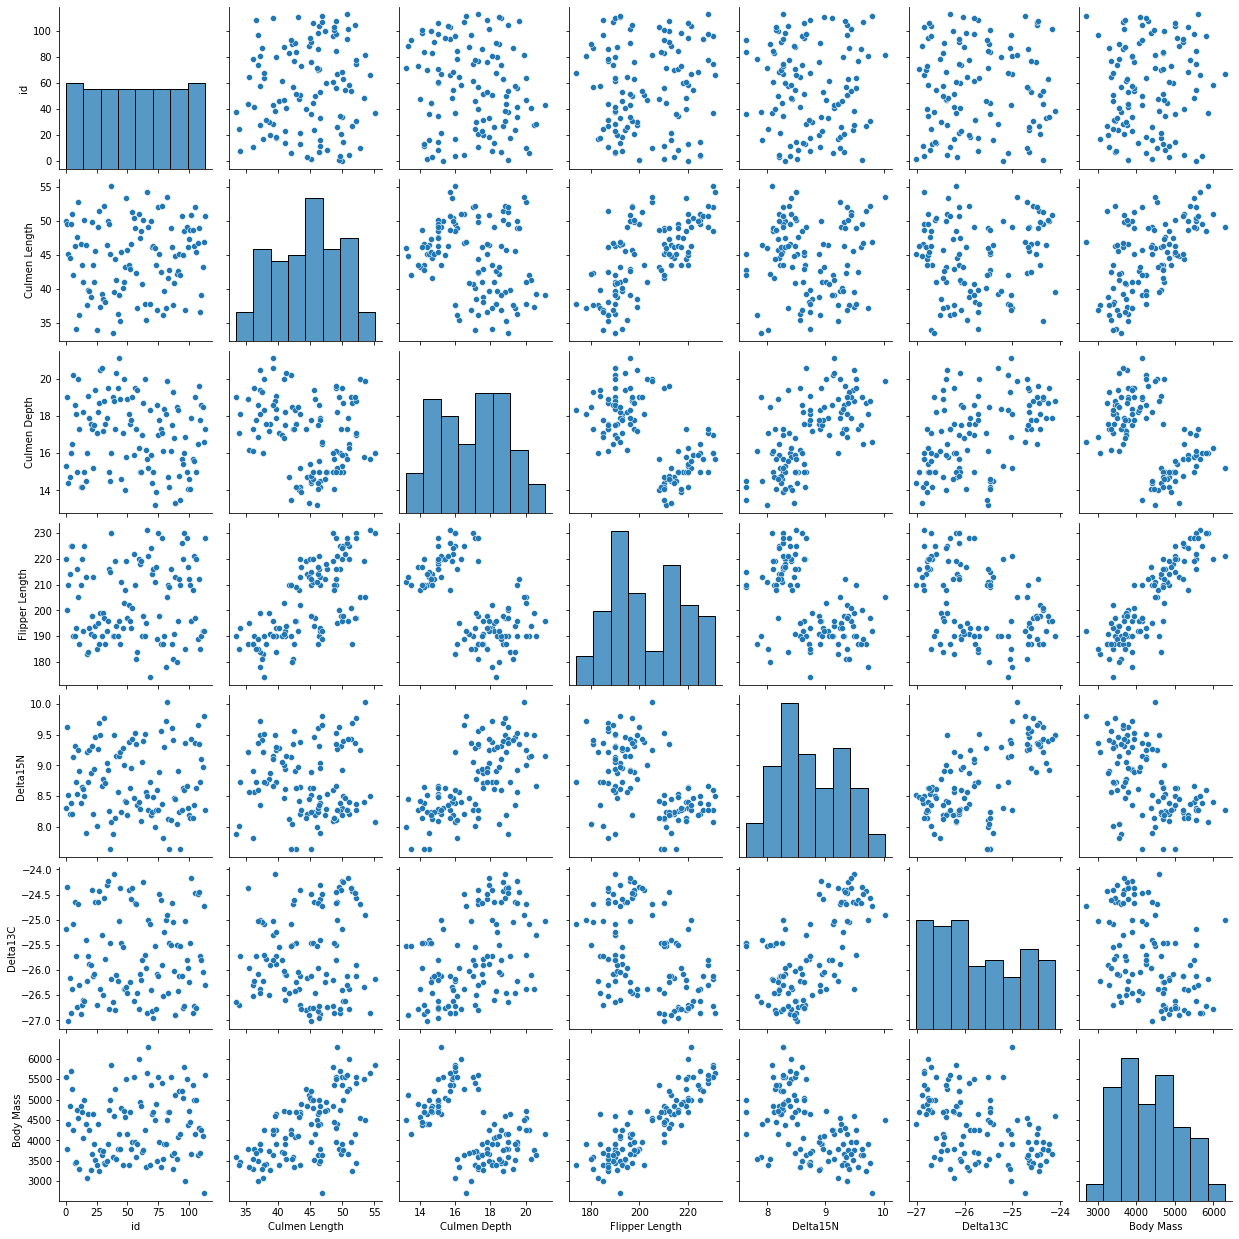

In [17]:
plt.figure(figsize=(25, 25))
sns.pairplot(train)

- 'Flipper Length', 'Culmen Length' 피처와 Body Mass의 강한 양의 상관 관계가 보임
- ' Delta 15 N'과 'Delta 13 C', 'Culmen Depth' 피처는 Body Mass와 음의 상관 관계가 보임
- Flipper Length와 Culmen Length는 양의 상관 관계, Flipper Length와 Culmen Depth는 음의 상관 관계를 보임 

Text(0.5, 1.0, 'Boxplot of Body Mass by Sex')

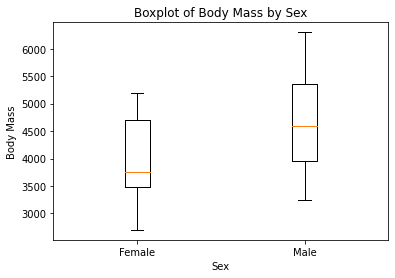

In [18]:
# Sex 피처와 Body Mass 피처
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([train[train['Sex'] == 'FEMALE']['Body Mass'],\
              train[train['Sex'] == 'MALE']['Body Mass']],\
              labels=['Female','Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Body Mass')
axes1.set_title('Boxplot of Body Mass by Sex')

암컷과 수컷별 무게 차이가 확실하게 있는 것으로 확인 가능

Text(0, 0.5, 'Body Mass')

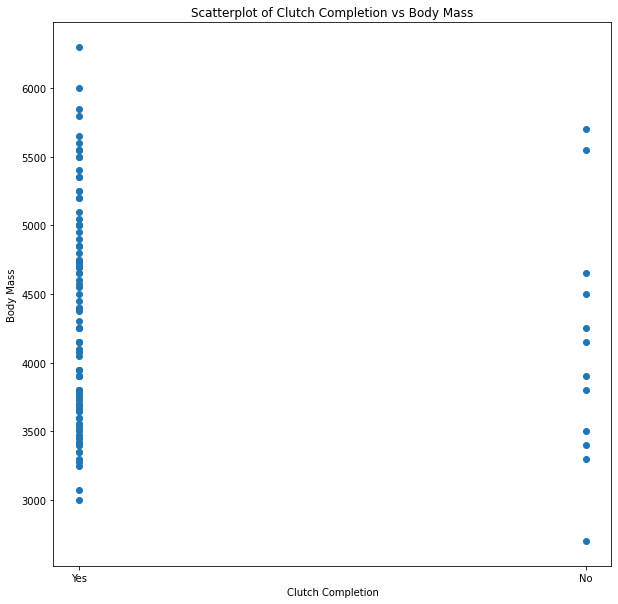

In [19]:
# Clutch Completion 피처와 Body Mass 피처
scatter_plot = plt.figure(figsize = (10,10))
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(train['Clutch Completion'],train['Body Mass'])
axes1.set_title('Scatterplot of Clutch Completion vs Body Mass')
axes1.set_xlabel('Clutch Completion')
axes1.set_ylabel('Body Mass')

In [20]:
train['Clutch Completion'].value_counts()

Yes    102
No      12
Name: Clutch Completion, dtype: int64

Clutch Completion 열의 경우 일단 Yes와 No의 데이터 개수 차이도 있고 이에 따른 무게 차이도 명확하게 보이지 않아 모델 학습에 포함시키지 않기로 결정

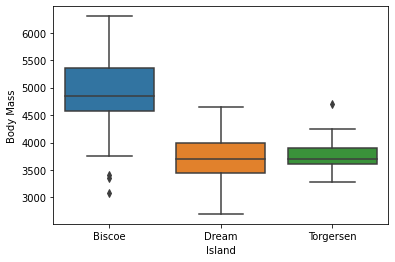

In [21]:
# Island 피처와 Body Mass 피처
sns.boxplot(x = 'Island', y = 'Body Mass', data = train)

- Biscoe 섬을 제외하곤 다른 두 섬은 명확한 차이가 없어 보이지만 일단 포함하기로 결정.
- Biscoe 섬이냐 아니냐에 대한 구별만 했으면 더 좋았을 것 같다.
- 종에 대한 시각화는 따로 하지 않았는데 섬과 비슷하게 Gentoo 종만 확연한 차이를 보였고, 이는 Gentoo 종의 펭귄이 Biscoe 섬에 대부분 서식하는 것으로 나타났다. 결국 종이 Gentoo냐 아니냐, 섬이 Biscoe냐 아니냐 정도로 0,1로 나누었으면 좋았을 것 같다

## One-Hot Encoding

In [22]:
# train 데이터
train = train.drop(['id', 'Clutch Completion'], axis = 1)
train = pd.get_dummies(train)

# test 데이터
test = test.drop(['id', 'Clutch Completion'], axis = 1)
test = pd.get_dummies(test)

- 앞서 판단한대로 Clutch Completion 열과 의미가 없어 보이는 id열을 제외하고 원-핫 인코딩 수행
- Island 열과 Sepcies 열은 원-핫 인코딩이 아닌 Biscoe 섬, Gentoo 종이냐 아니냐에 대한 Label Encoding을 수행했으면 더 좋았을 것 같다.

## 표준화

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['Culmen Length', 'Culmen Depth', 'Flipper Length', 'Delta15N', 'Delta13C']]) 
test_scaled = scaler.transform(test[['Culmen Length', 'Culmen Depth', 'Flipper Length', 'Delta15N', 'Delta13C']])

In [24]:
train[['Culmen Length', 'Culmen Depth', 'Flipper Length', 'Delta15N', 'Delta13C']] = train_scaled
test[['Culmen Length', 'Culmen Depth', 'Flipper Length', 'Delta15N', 'Delta13C']] = test_scaled

# 4. Modeling

In [25]:
train_input = train.drop(['Body Mass'], axis=1)
train_target = train['Body Mass']

train_input

,Culmen Length,Culmen Depth,Flipper Length,Delta15N,Delta13C,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,1.016685,-0.887255,1.161653,-7.755480e-01,6.309514e-01,0,0,1,1,0,0,0,1
1,0.922318,1.027037,-0.209242,1.601553e+00,1.629486e+00,0,1,0,0,1,0,0,1
2,0.091884,-1.352893,0.476205,-3.911490e-01,-1.533908e+00,0,0,1,1,0,0,1,0
3,-0.021357,-1.197680,0.750384,-9.622064e-01,-5.235685e-01,0,0,1,1,0,0,1,0
4,0.941191,-0.525091,1.504376,-6.355139e-01,-1.325731e+00,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.512363,0.406186,-1.237413,-6.370870e-15,1.261964e-14,1,0,0,0,0,1,1,0
110,-1.021652,0.820087,-0.894689,6.678491e-01,-8.577043e-02,1,0,0,0,1,0,0,1
111,-0.266712,0.768349,-0.757600,4.171361e-01,-3.714788e-01,1,0,0,0,1,0,0,1
112,0.431607,-0.214666,-0.757600,1.915640e+00,1.167108e+00,0,1,0,0,1,0,1,0


## LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
pred_lr = lr.predict(test)

In [28]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=train_input.columns)
coeff.sort_values(ascending=False)

Species_Gentoo penguin (Pygoscelis papua)            618.9
Flipper Length                                       210.0
Sex_MALE                                             186.8
Culmen Length                                        125.1
Culmen Depth                                         120.4
Delta13C                                              69.6
Island_Biscoe                                         61.0
Island_Torgersen                                     -19.7
Island_Dream                                         -41.3
Delta15N                                             -63.7
Species_Adelie Penguin (Pygoscelis adeliae)         -132.6
Sex_FEMALE                                          -186.8
Species_Chinstrap penguin (Pygoscelis antarctica)   -486.2
dtype: float64

- RMSE 289.765486
- 회귀 계수가 큰 피처가 많이 보이므로 수정이 필요해 보인다

## CatBoost

In [31]:
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

cb_cv = CatBoostRegressor()
cb_params = {'max_depth' : [4, 5, 6, 7],
              'n_estimators' : [5, 10, 20, 50, 100, 200],
              'learning_rate' : [0.1, 0.2, 0.4, 0.6, 0.8, 1]}
grid = GridSearchCV(estimator = cb_cv, param_grid = cb_params)

grid.fit(train_input, train_target)
best_param = grid.best_params_
print(best_param)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1:	learn: 296.5937333	total: 1.7ms	remaining: 83.1ms
2:	learn: 263.5144227	total: 2.62ms	remaining: 84.8ms
3:	learn: 244.8350452	total: 3.52ms	remaining: 84.5ms
4:	learn: 221.7281949	total: 4.38ms	remaining: 83.2ms
5:	learn: 211.1314231	total: 5.26ms	remaining: 82.4ms
6:	learn: 187.1187758	total: 6.13ms	remaining: 81.5ms
7:	learn: 165.8801899	total: 7ms	remaining: 80.5ms
8:	learn: 145.1687312	total: 7.86ms	remaining: 79.5ms
9:	learn: 124.9520892	total: 8.85ms	remaining: 79.6ms
10:	learn: 108.5308931	total: 9.74ms	remaining: 78.8ms
11:	learn: 106.2198385	total: 10.6ms	remaining: 77.7ms
12:	learn: 94.8355425	total: 11.5ms	remaining: 76.7ms
13:	learn: 86.4748077	total: 12.3ms	remaining: 75.7ms
14:	learn: 74.1074416	total: 13.2ms	remaining: 74.7ms
15:	learn: 69.8074855	total: 14ms	remaining: 73.6ms
16:	learn: 64.3737709	total: 14.9ms	remaining: 72.6ms
17:	learn: 59.5930080	total: 15.7ms	remaining: 71.6ms
18:	learn: 54.9807485	total: 16.6ms	remaining: 70.

In [32]:
cb = CatBoostRegressor(max_depth = 4, learning_rate = 0.1, n_estimators = 50)
cb.fit(train_input, train_target)
pred = cb.predict(test)

0:	learn: 722.3906963	total: 542us	remaining: 26.6ms
1:	learn: 676.8499676	total: 1.03ms	remaining: 24.9ms
2:	learn: 636.6445294	total: 1.52ms	remaining: 23.8ms
3:	learn: 601.0346574	total: 2.27ms	remaining: 26.2ms
4:	learn: 570.5777583	total: 3.46ms	remaining: 31.1ms
5:	learn: 539.6677734	total: 4.1ms	remaining: 30.1ms
6:	learn: 506.5284422	total: 4.74ms	remaining: 29.1ms
7:	learn: 481.2609257	total: 5.36ms	remaining: 28.1ms
8:	learn: 461.8993888	total: 5.98ms	remaining: 27.2ms
9:	learn: 442.5132178	total: 6.62ms	remaining: 26.5ms
10:	learn: 430.4904189	total: 7.25ms	remaining: 25.7ms
11:	learn: 416.7660712	total: 7.87ms	remaining: 24.9ms
12:	learn: 400.6833885	total: 8.48ms	remaining: 24.1ms
13:	learn: 387.9139565	total: 9.13ms	remaining: 23.5ms
14:	learn: 375.6548077	total: 9.76ms	remaining: 22.8ms
15:	learn: 363.1772992	total: 10.4ms	remaining: 22ms
16:	learn: 355.1774999	total: 11ms	remaining: 21.3ms
17:	learn: 346.7965437	total: 11.6ms	remaining: 20.7ms
18:	learn: 338.7075161	tot

- RMSE : 303.37107

# 5. Submission

In [38]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('../content/sample_submission.csv')
submission['Body Mass (g)'] = pred_lr
submission.to_csv("submission_pred_lr.csv", index=False)
submission

,id,Body Mass (g)
0,0,4378.997333
1,1,5697.235516
2,2,3646.960480
3,3,3285.266303
4,4,3527.776474
...,...,...
223,223,4119.874980
224,224,4755.393319
225,225,4745.187682
226,226,4099.055269


# 피드백
1. LinearRegression 모델에서 회귀 계수가 높은 피처가 많이 나왔는데 규제가 적용된 회귀 모델들(Lidge, Lasso 등)을 사용했다면 더 좋은 점수가 나올 수 있었을 것 같다.
2. CatBoost가 범주형 피처들에 강하다고 들었는데, 실제로 XGBoost, LGBM 등의 모델들보다 점수가 좋았다. 하지만 파라미터와 같은 모델에 대한 이해가 부족해 더 점수를 올리지 못했는데, 이에 대해 보충해봤으면 좋았을 것 같다.
3. 경험이 많이 없다 보니 train 데이터를 train_test_split()을 통해 훈련 데이터와 테스트 데이터로 나눠서 score()를 통해 더 많은 모델들의 점수를 확인해 볼 생각을 하지 못했다.
4. SEX 열의 결측치 대치에 대한 확실한 기준을 세울 필요가 있다. SEX 열이 타겟 데이터 예측에 영향을 끼치는 것을 확인했으니 분류 모델들을 활용해 예측 모델을 만들어 SEX 열의 결측치를 예측해 대입했으면 더 좋았을 것 같다.
5. 하나의 모델로만 예측치를 만드는 것이 아니라 성능이 좋은 여러 모델들을 앙상블 모델로 만들어 최종 pred를 만들어 볼 시도를 해봤으면 좋았을 것 같다.
6. 범주형 피처에 대한 시각화, 전처리가 아쉬웠다. 좀 더 시각화 과정을 통해 더 많은 인사이트를 뽑아내고 더 효과적인 feature engineering을 통해 RMSE를 더 낮출 수 있었을 것 같다.
7. 범주형 피처의 전처리 방안(원-핫 인코딩, Label Encoding)에 대한 공부가 더 필요하다. 
8. XGBRegressor와 LGBMRegressor 모델을 활용할 때 피처 중요도가 0이 나오는 피처가 많았다. 이에 대한 대처를 하지 못해 성능이 그리 좋지 못했다.